In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent in 1D

In [2]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def df(x):
  return 6*x - 3

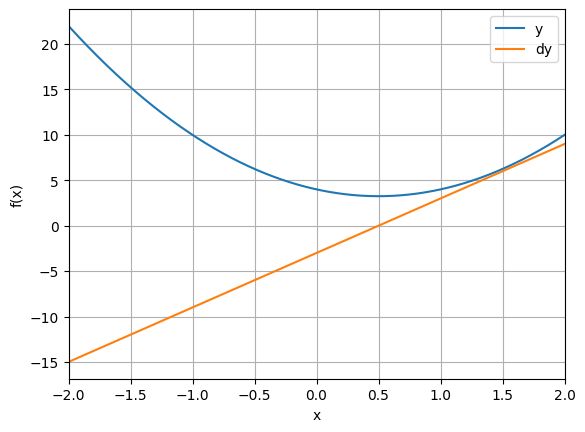

In [6]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,df(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

## Gradient Descent 1D Function

In [26]:
# Gradient Descent Function
def gradient(training_epochs, learning_rate, localmin, modelparams):
  for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate*grad

    # Store the model parameters and outputs on each iteration for plotting later
    modelparams[i,0] = localmin.item()
    modelparams[i,1] = grad.item()
  return modelparams


0.4951052882966129


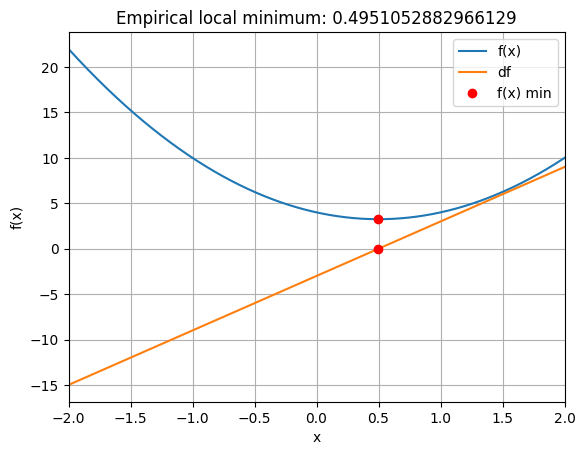

In [41]:
starting = np.random.choice(x,1)
learning_rate = 0.01
training_epochs = 100
modelparams = np.zeros((training_epochs,2))
localmin = gradient(training_epochs, learning_rate, starting, modelparams)[-1][0]
print(localmin) # we know that it will be 0.5 analytically

# plotting it
plt.plot(x,fx(x), x,df(x))
plt.plot(localmin,df(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin)
plt.show()

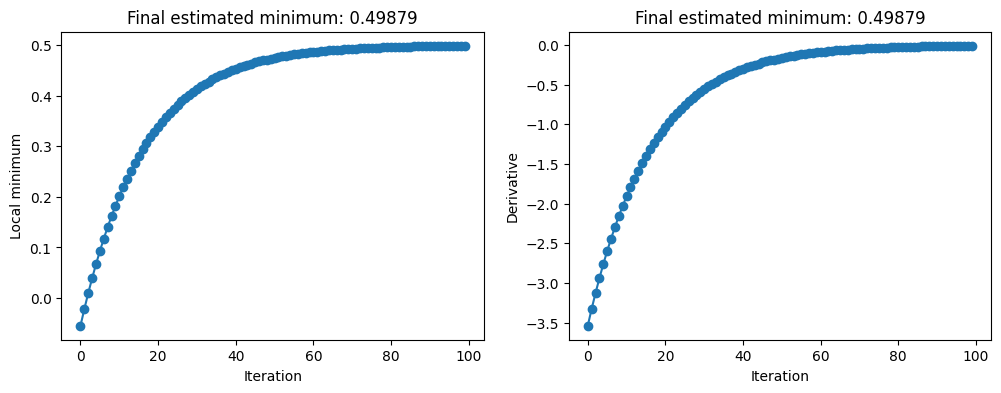

In [28]:
# plotting how gradient desecnet behaves
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

## Plottign Multiple Cases

Learning Rate: 0.01, Epochs: 100, Local Minimum: 0.49669


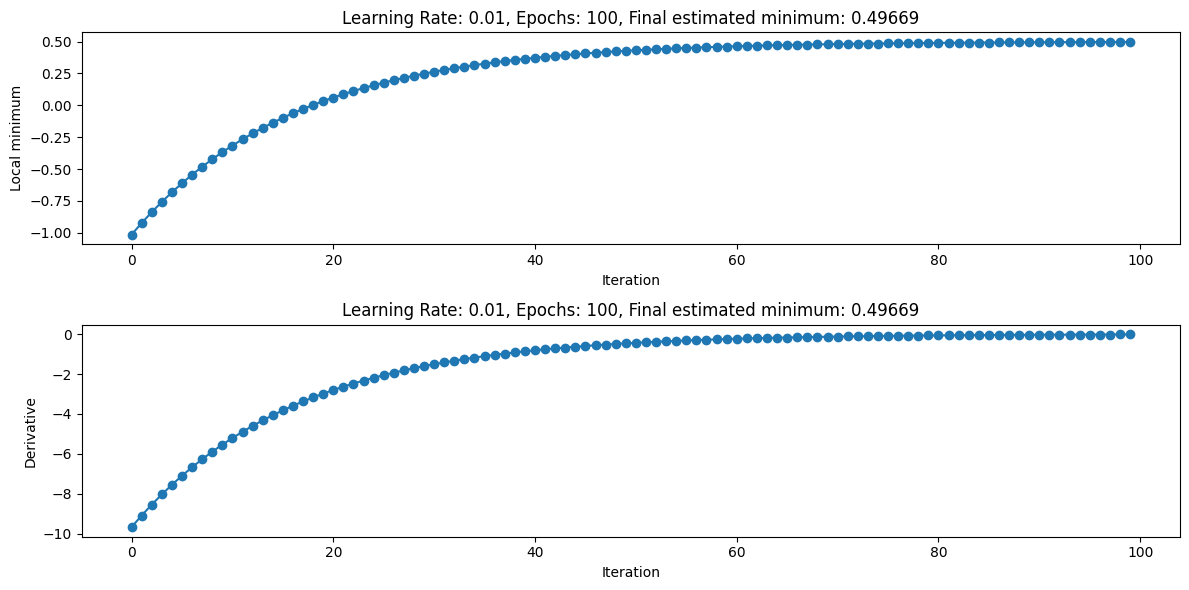

Learning Rate: 0.001, Epochs: 100, Local Minimum: 0.72680


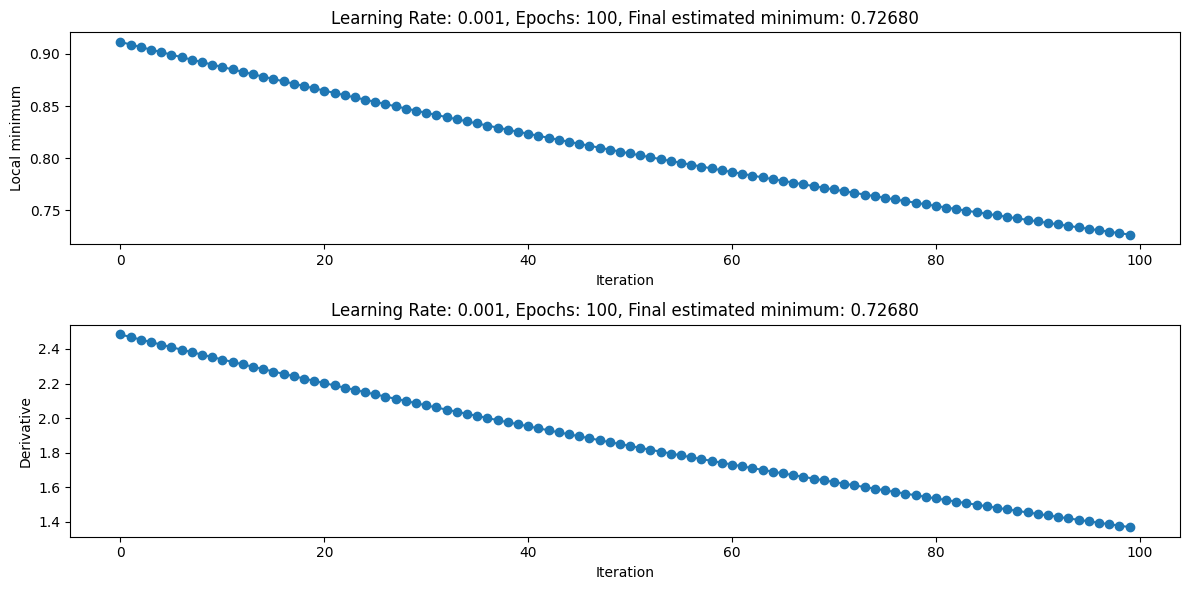

Learning Rate: 5, Epochs: 100, Local Minimum: 1389599908644592849362883126071715193022900271361701813955079079775653542221852056949531002463897995880822229090155916082216324570251775184994304.00000


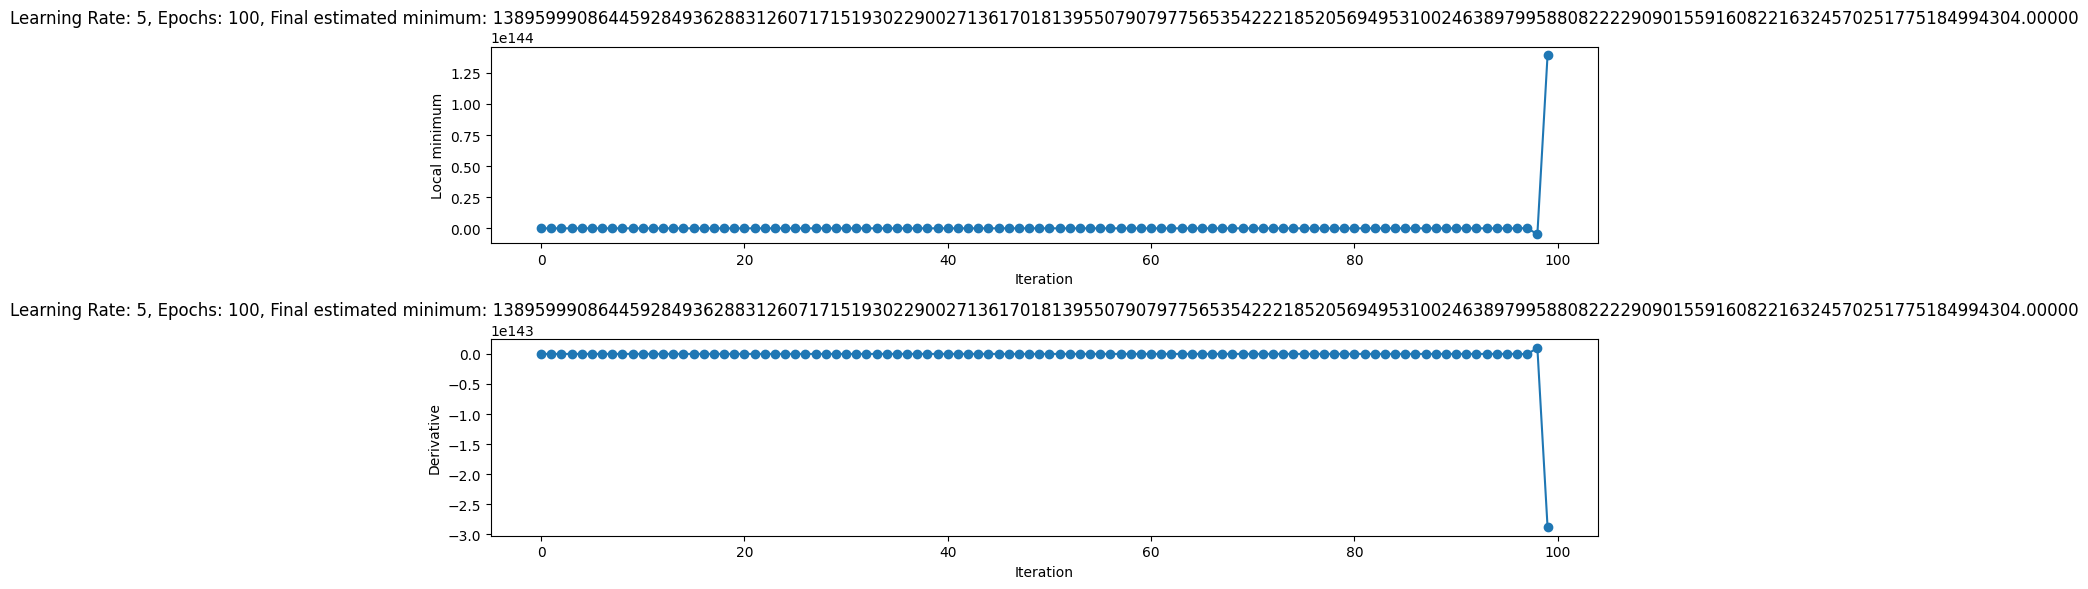

Learning Rate: 0.001, Epochs: 1000, Local Minimum: 0.50202


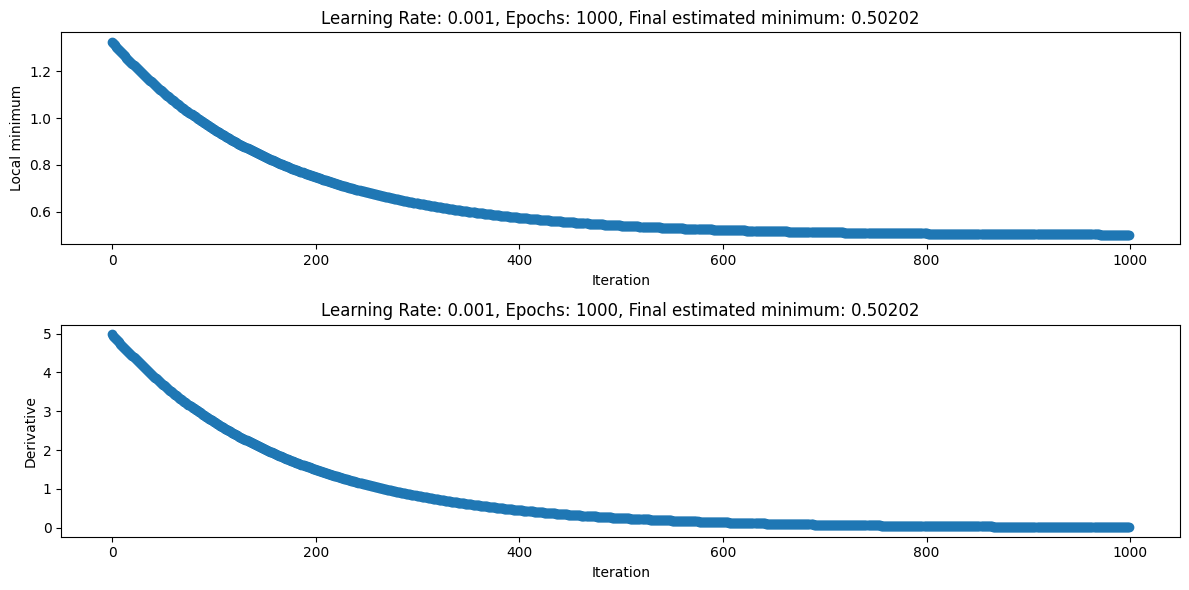

Learning Rate: 0.01, Epochs: 200, Local Minimum: 0.50000


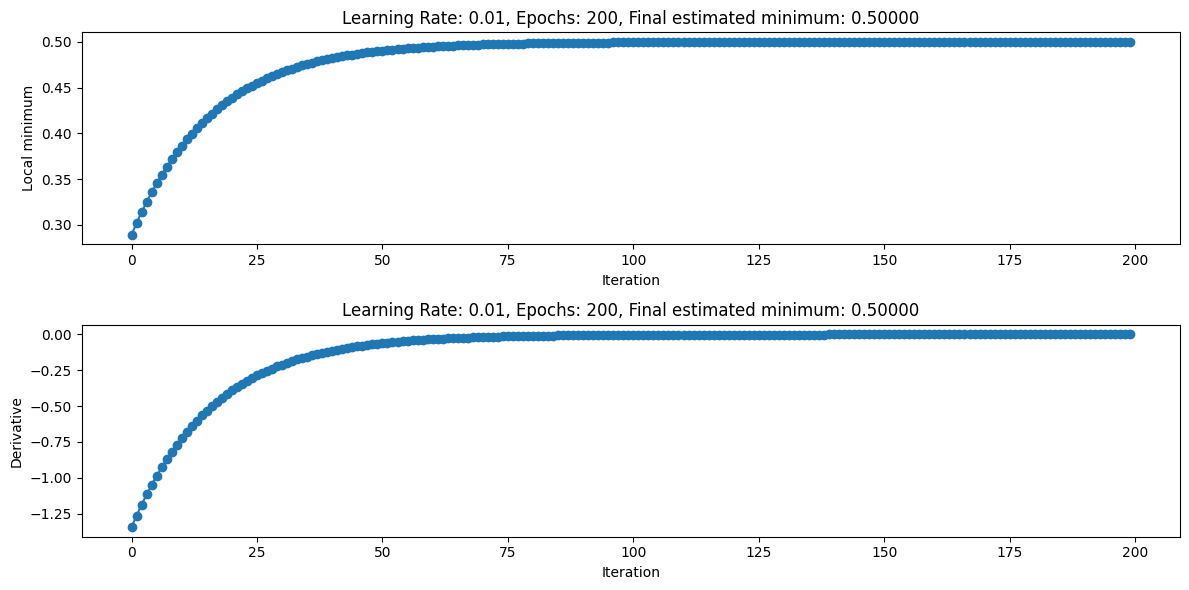

In [38]:
cases = [
    (0.01, 100),    # Original case
    (0.001, 100),   # Smaller learning rate, very slow
    (5, 100),     # Larger learning rate, result in a very bad and large result
    (0.001, 1000),  # more epochs, smaller learning rate
    (0.01, 200)     # More epochs
]

for learning_rate, training_epochs in cases:
    starting = np.random.choice(x, 1)
    modelparams = np.zeros((training_epochs, 2))

    # Run gradient descent
    localmin = gradient(training_epochs, learning_rate, starting, modelparams)[-1][0]
    print(f'Learning Rate: {learning_rate}, Epochs: {training_epochs}, Local Minimum: {localmin:.5f}')

    # Create a new figure for each case
    plt.figure(figsize=(12, 6))

    # Plotting results
    for i in range(2):
        plt.subplot(2, 1, i + 1)  # Two rows, one column
        plt.plot(modelparams[:, i], 'o-')
        plt.xlabel('Iteration')
        plt.title(f'Learning Rate: {learning_rate}, Epochs: {training_epochs}, Final estimated minimum: {localmin:.5f}')

        if i == 0:
            plt.ylabel('Local minimum')
        else:
            plt.ylabel('Derivative')

    plt.tight_layout()
    plt.show()

# Gradient Descent 2D

In [43]:
import sympy as sym # sympy to compute the partial derivative

In [44]:
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

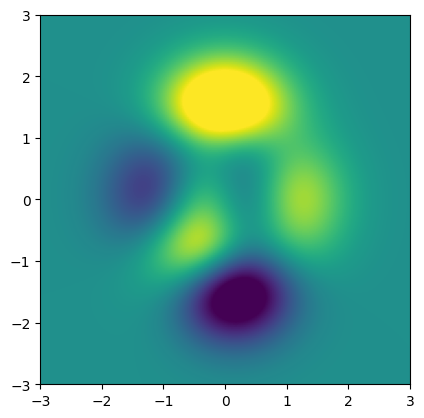

In [45]:
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()
# - Yellow areas represent peaks, purple areas represent valleys (minimas), and green represents a plane approaching zero.

In [47]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )


### Explanation for the df_x, and df_y lines

sym.diff(sZ, sx) and sym.diff(sZ, sy):
- These functions compute the symbolic derivatives of a function sZ with respect to the variables sx and sy, respectively. Here, sZ is presumably a symbolic expression defined using SymPy.
- The result of these derivative computations is another symbolic expression representing the rate of change of sZ concerning sx and sy.

sym.lambdify():
- lambdify is a function in SymPy that converts symbolic expressions into callable functions that can take numerical input. This means you can evaluate the symbolic derivatives (computed in the previous step) as regular Python functions.
- The first argument, (sx, sy), specifies the input variables for the generated function.
- The second argument is the symbolic expression (the derivative) that you want to convert into a function.
- The third argument 'sympy' indicates that the output function should use the SymPy library for numerical evaluation.

In [49]:
localmin = np.random.rand(2)*4-2 # random starting point (uniform between -2 and +2)
print(f'Starting point is: {localmin}')
startpnt = localmin[:]

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin

print(f'local minimum point is: {localmin}')

Starting point is: [ 0.05922476 -0.72217468]
local minimum point is: [0.228278920556369 -1.62553495750000]


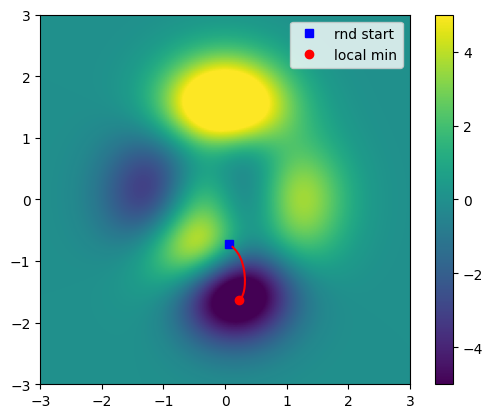

In [50]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

# Running experiments to understand gradient descent

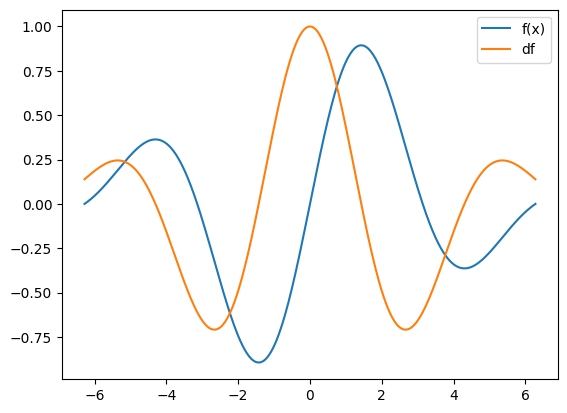

In [51]:
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def df(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

x  = np.linspace(-2*np.pi,2*np.pi,401)
plt.plot(x,fx(x), x,df(x))
plt.legend(['f(x)','df']);

## Choosing a Random starting value similar to what we did earlier

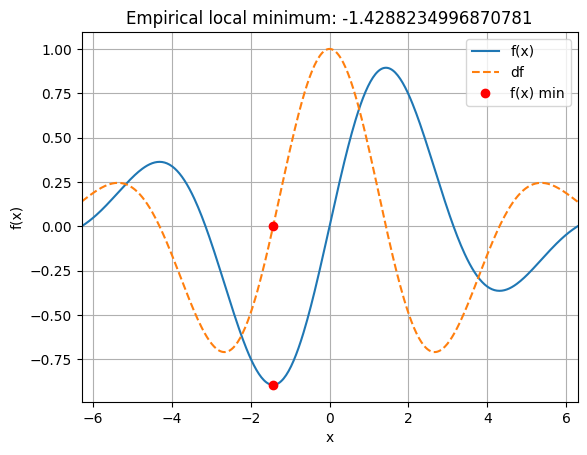

In [53]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = df(localmin)
  localmin = localmin - learning_rate*grad



# plot the results
plt.plot(x,fx(x), x,df(x),'--')
plt.plot(localmin,df(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


## Run parametric experiments
### Experiment 1: systematically varying the starting locations


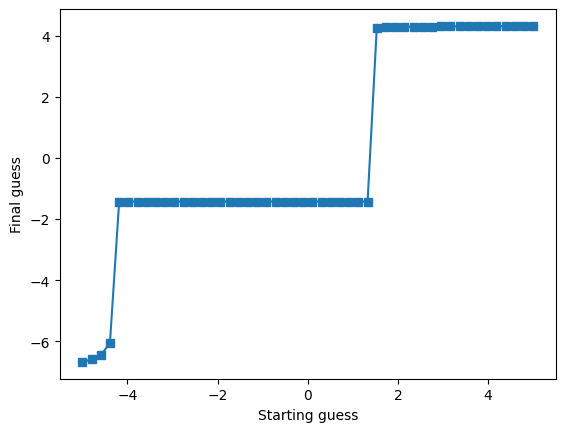

In [54]:
startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx,localmin in enumerate(startlocs):

  # run through training
  for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate*grad

  # store the final guess
  finalres[idx] = localmin


# plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

### Experiment 2: systematically varying the learning rate

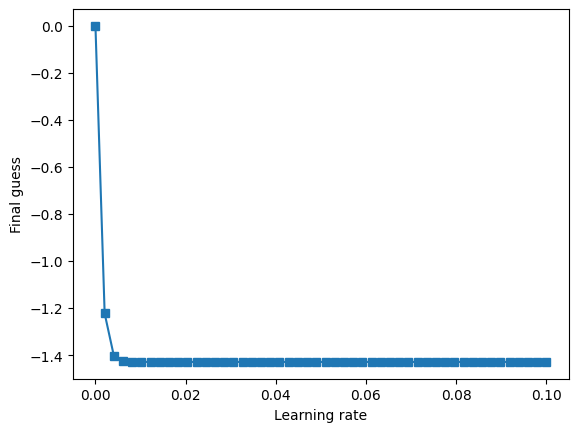

In [55]:
learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx,learningRate in enumerate(learningrates):

  # force starting guess to 0
  localmin = 0

  # run through training
  for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learningRate*grad

  # store the final guess
  finalres[idx] = localmin


plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

### Experiment 3: interaction between learning rate and training epochs

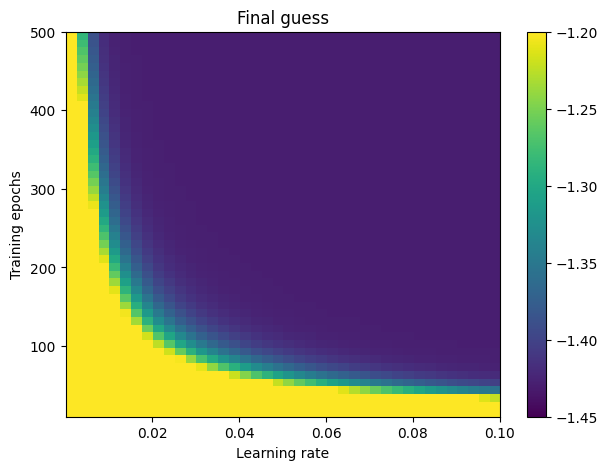

In [56]:
# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))

# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):

    # run through training (again fixing starting location)
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = df(localmin)
      localmin = localmin - learningRate*grad

    # store the final guess
    finalres[Lidx,Eidx] = localmin

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()
